In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import datetime

In [5]:
CarsData = pd.read_csv('cars.csv')
CarsData.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [6]:
CarsData.shape

(394, 12)

In [ ]:
Replace the '?' value with NaN values

In [20]:
CarsData = CarsData.replace('?', np.nan)
CarsData.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [21]:
CarsData.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [23]:
CarsData['MPG'] = CarsData['MPG'].fillna(CarsData['MPG'].mean())
CarsData.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [24]:
CarsData = CarsData.dropna()

In [25]:
CarsData.shape

(387, 12)

In [26]:
CarsData.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [27]:
CarsData.drop(['Model'], axis=1, inplace=True)

In [28]:
CarsData.sample(6)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
37,14.0,8,350,165,4209,12,1971,"US; Detroit, Michigan",3.15,3.58,9
393,31.0,4,119,82,2720,19.4,1982,US,3.15,3.29,9.4
119,19.0,4,121,112,2868,15.5,1973,Europe,3.03,3.39,7.6
152,15.0,6,250,72,3432,21,1975,US,3.05,3.03,9
96,18.0,6,225,105,3121,16.5,1973-1974,US,3.15,3.29,9.4
315,34.3,4,97,78,2188,15.8,1980,Europe,3.03,3.11,9.6


In [29]:
CarsData.drop(['bore', 'stroke', 'compression-ratio'], inplace=True, axis=1)
CarsData.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [30]:
CarsData['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [31]:
CarsData['Year'].loc[CarsData['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [33]:
extr = CarsData['Year'].str.extract(r'^(\d{4})', expand=False)
extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [34]:
CarsData['Year'].isnull().values.any()

False

In [35]:
CarsData['Year'] = pd.to_numeric(extr)
CarsData['Year'].dtype

dtype('int64')

In [36]:
CarsData.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [40]:
CarsData['Age'] = datetime.datetime.now().year - CarsData['Year']

CarsData.drop(['Year'], axis=1, inplace=True)

CarsData.sample(6)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
240,21.5,4,121,110,2600,12.8,Europe,43
346,34.7,4,105,63,2215,14.9,US,39
105,12.0,8,350,180,4499,12.5,US,47
124,20.0,6,198,95,3102,16.5,US,46
195,29.0,4,90,70,1937,14.2,Europe,44
182,25.0,4,140,92,2572,14.9,US,44


In [42]:
CarsData.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [43]:
CarsData['Cylinders'].isnull().values.any()

False

In [44]:
CarsData['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [45]:
CarsData['Cylinders'].loc[CarsData['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [50]:
Cylinders = CarsData['Cylinders'].loc[CarsData['Cylinders'] != '-']
cmean = Cylinders.astype(int).mean()

In [51]:
CarsData['Cylinders'] = CarsData['Cylinders'].replace('-', cmean).astype(int)

In [52]:
CarsData.head(30)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307,130,3504,12,"US; Detroit, Michigan",50
3,16.000000,8,304,150,3433,12,US,50
4,17.000000,8,302,140,3449,10.5,US],50
6,14.000000,8,454,220,4354,9,"US; Detroit, Michigan",50
7,23.551429,8,440,215,4312,8.5,US,50
8,14.000000,8,455,225,4425,8.5,US,50
9,15.000000,8,390,190,3850,8.5,US],50
10,15.000000,8,383,170,3563,10,US,50
11,14.000000,5,340,160,3609,8,US,50
12,23.551429,8,400,150,3761,9.5,"US; Detroit, Michigan",50


In [53]:
CarsData.dtypes

MPG             float64
Cylinders         int32
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [54]:
CarsData['Displacement'] = pd.to_numeric(CarsData['Displacement'], errors='coerce')
CarsData.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [56]:
CarsData['Weight'] = pd.to_numeric(CarsData['Weight'], errors='coerce')
CarsData.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [57]:
CarsData['Acceleration'] = pd.to_numeric(CarsData['Acceleration'], errors='coerce')
CarsData.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [58]:
CarsData['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [59]:
CarsData['Origin'].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [60]:
CarsData['Origin'] = np.where(CarsData['Origin'].str.contains('US'),
                             'US',
                              CarsData['Origin'])
CarsData['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [61]:
CarsData['Origin'] = np.where(CarsData['Origin'].str.contains('Japan'),
                             'Japan',
                              CarsData['Origin'])
CarsData['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [62]:
CarsData['Origin'] = np.where(CarsData['Origin'].str.contains('Europe'),
                             'Europe',
                              CarsData['Origin'])
CarsData['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [63]:
CarsData.head(25)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,50
3,16.000000,8,304.0,150,3433,12.0,US,50
4,17.000000,8,302.0,140,3449,10.5,US,50
6,14.000000,8,454.0,220,4354,9.0,US,50
7,23.551429,8,440.0,215,4312,8.5,US,50
8,14.000000,8,455.0,225,4425,8.5,US,50
9,15.000000,8,390.0,190,3850,8.5,US,50
10,15.000000,8,383.0,170,3563,10.0,US,50
11,14.000000,5,340.0,160,3609,8.0,US,50
12,23.551429,8,400.0,150,3761,9.5,US,50


In [64]:
CarsData.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,43.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,41.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,44.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [ ]:
CarsData.to_csv('CarsDataCleaned.csv', index=False)

In [67]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Miles Per Gallon')

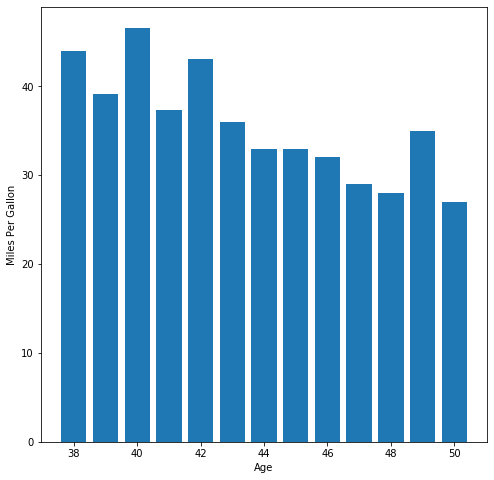

In [70]:
plt.figure(figsize=(8, 8))
plt.bar(CarsData['Age'], CarsData['MPG'])
plt.xlabel('Age')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

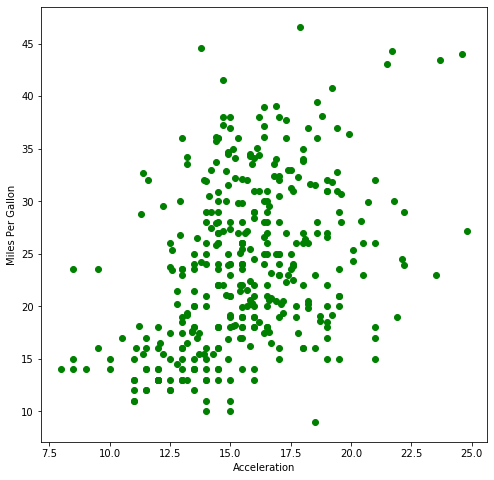

In [73]:
plt.figure(figsize=(8, 8))
plt.scatter(CarsData['Acceleration'], CarsData['MPG'], color='g')
plt.xlabel('Acceleration')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

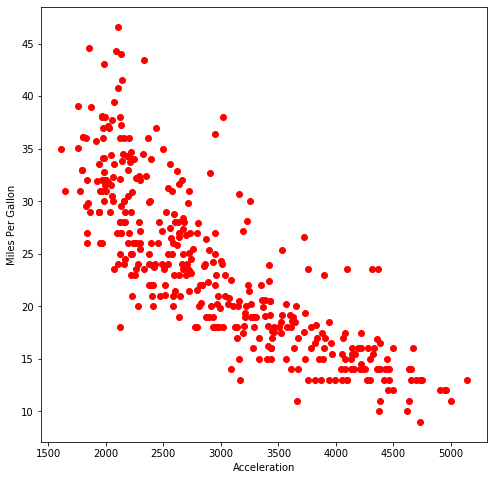

In [74]:
plt.figure(figsize=(8, 8))
plt.scatter(CarsData['Weight'], CarsData['MPG'], color='r')
plt.xlabel('Acceleration')
plt.ylabel('Miles Per Gallon')

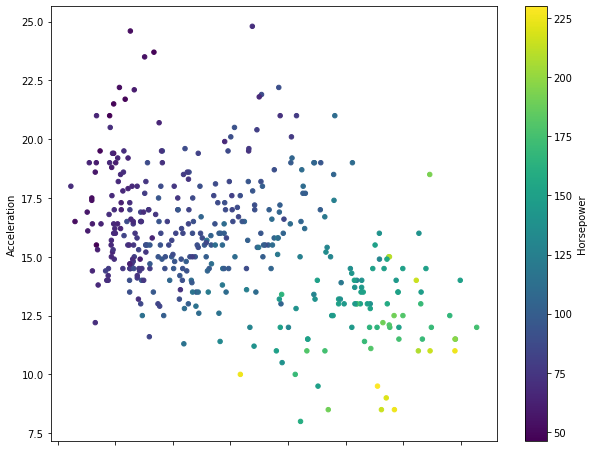

In [76]:
CarsData.plot.scatter(x='Weight',
                      y='Acceleration',
                      c='Horsepower',
                      colormap= 'viridis',
                      figsize=(10, 8));

Text(0, 0.5, 'Miles Per Gallon')

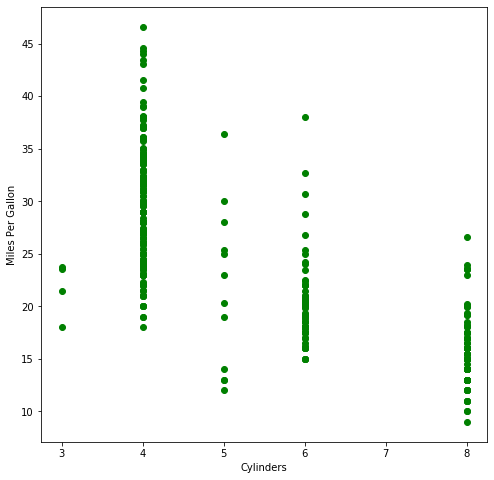

In [77]:
plt.figure(figsize=(8, 8))
plt.scatter(CarsData['Cylinders'], CarsData['MPG'], color='g')
plt.xlabel('Cylinders')
plt.ylabel('Miles Per Gallon')

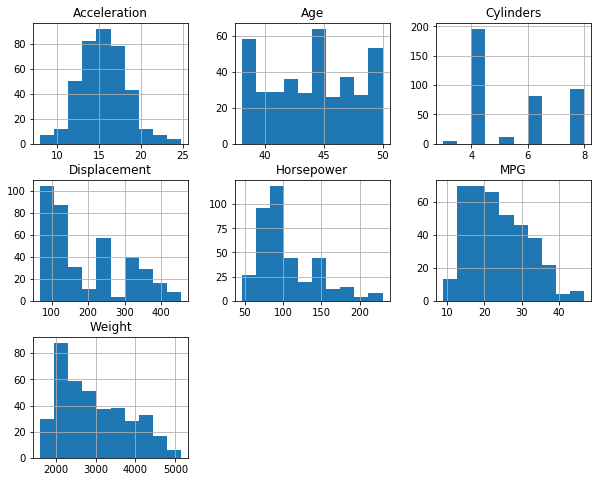

In [78]:
CarsData.hist(figsize= (10, 8))
plt.show()

# END OF A